In [1]:
import numpy as np
import pandas as pd

In [3]:
animals = pd.DataFrame({'kind': ['cat', 'god', 'cat', 'dog'],
                        'height': [9.1, 6.0, 9.5, 34.0],
                        'weight': [7.9, 7.5, 9.9, 198.0]})
animals

,kind,height,weight
0,cat,9.1,7.9
1,god,6.0,7.5
2,cat,9.5,9.9
3,dog,34.0,198.0


In [4]:
animals.groupby('kind').agg(min_height=pd.NamedAgg(column='height', aggfunc='min'),
                            max_height=pd.NamedAgg(column='height', aggfunc='max'),
                            average_weight=pd.NamedAgg(column='weight', aggfunc=np.mean))

,min_height,max_height,average_weight
kind,,,
cat,9.1,9.5,8.9
dog,34.0,34.0,198.0
god,6.0,6.0,7.5


In [5]:
animals.groupby('kind').agg(min_height=('height', 'min'),
                            max_height=('height', 'max'),
                            average_weight=('weight', 'mean'))

,min_height,max_height,average_weight
kind,,,
cat,9.1,9.5,8.9
dog,34.0,34.0,198.0
god,6.0,6.0,7.5


In [8]:
animals.groupby('kind').agg(**{'total weight': pd.NamedAgg(column='weight', aggfunc='sum')})

,total weight
kind,
cat,17.8
dog,198.0
god,7.5


In [13]:
animals.groupby('kind').height.agg(min_height='min', max_height='max')

,min_height,max_height
kind,,
cat,9.1,9.5
dog,34.0,34.0
god,6.0,6.0


In [3]:
df = pd.DataFrame({ "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
                    "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
                    "C": np.random.randn(8),
                    "D": np.random.randn(8)})
grouped = df.groupby('A')
grouped.agg({'C': np.sum, 'D': lambda x: np.std(x, ddof=1)})

,C,D
A,,
bar,-1.185752,0.881762
foo,2.739539,0.493193


In [19]:
grouped.agg({'C': 'sum', 'D': lambda x: 'std(x, ddof=1)'})

,C,D
A,,
bar,-0.723202,"std(x, ddof=1)"
foo,-3.011282,"std(x, ddof=1)"


In [21]:
animals.groupby('kind')[['height']].agg(lambda x: set(x))

,height
kind,
cat,"{9.1, 9.5}"
dog,{34.0}
god,{6.0}


In [22]:
animals.groupby('kind')['height'].agg(lambda x: set(x))

kind
cat    {9.1, 9.5}
dog        {34.0}
god         {6.0}
Name: height, dtype: object

In [23]:
animals

,kind,height,weight
0,cat,9.1,7.9
1,god,6.0,7.5
2,cat,9.5,9.9
3,dog,34.0,198.0


In [39]:
index = pd.date_range('10/1/1999', periods=1100)
ts = pd.Series(np.random.normal(0.5, 2, 1100), index)
ts = ts.rolling(window=100, min_periods=100).mean().dropna()
ts.head(),ts.size

(2000-01-08    0.563876
 2000-01-09    0.568225
 2000-01-10    0.548648
 2000-01-11    0.545234
 2000-01-12    0.544365
 Freq: D, dtype: float64,
 1001)

In [40]:
transformed = ts.groupby(lambda x: x.year).transform(lambda x: (x-x.mean()) / x.std())
transformed.head(), transformed.size

(2000-01-08   -0.297648
 2000-01-09   -0.272518
 2000-01-10   -0.385641
 2000-01-11   -0.405369
 2000-01-12   -0.410392
 Freq: D, dtype: float64,
 1001)

In [30]:
year = ts.groupby(lambda x: x.year)
year.sum()

2000    100.291953
2001    177.463685
2002    121.154282
dtype: float64

In [32]:
ts.value_counts()

0.161900    1
0.572928    1
0.369446    1
0.420039    1
0.438405    1
           ..
0.382935    1
0.398930    1
0.384436    1
0.362613    1
0.439364    1
Length: 1001, dtype: int64

In [35]:
compare = pd.DataFrame({'Original': ts, 'Transformed': transformed})
compare

,Original,Transformed
2000-01-08,0.161900,-1.117451
2000-01-09,0.128243,-1.437634
2000-01-10,0.090705,-1.794733
2000-01-11,0.148708,-1.242947
2000-01-12,0.164880,-1.089107
...,...,...
2002-09-30,0.415016,-0.157491
2002-10-01,0.371060,-0.467045
2002-10-02,0.375378,-0.436639
2002-10-03,0.381183,-0.395756


<AxesSubplot:>

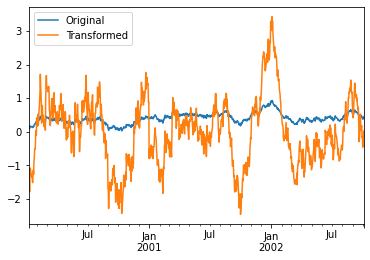

In [36]:
compare.plot()

In [43]:
max = ts.groupby(lambda x: x.year).transform('max')
min = ts.groupby(lambda x: x.year).transform('min')
(max-min).head()

2000-01-08    0.799818
2000-01-09    0.799818
2000-01-10    0.799818
2000-01-11    0.799818
2000-01-12    0.799818
Freq: D, dtype: float64

In [44]:
ts1 = pd.Series(np.random.normal(0.5, 2, 1100), index)
ts1.value_counts()

-0.515583    1
-1.794204    1
 0.604474    1
-1.327834    1
 0.602870    1
            ..
 2.695455    1
 0.921460    1
-0.297997    1
 1.718537    1
 3.665712    1
Length: 1100, dtype: int64

In [52]:
ts2 = pd.Series(np.random.randn(1000)).rolling(window=100, min_periods=100).mean()
ts2

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
995   -0.090455
996   -0.090506
997   -0.084099
998   -0.082610
999   -0.074222
Length: 1000, dtype: float64

In [74]:
data_df = pd.DataFrame(np.random.randn(1000,3), columns=list('ABC'))
data_df['C']= ts2
data_df

,A,B,C
0,-1.206667,0.030467,NaN
1,-0.951644,-2.182482,NaN
2,1.049155,-0.854248,NaN
3,-1.410123,-1.224888,NaN
4,0.801795,-0.217106,NaN
...,...,...,...
995,-1.081367,0.738480,0.015749
996,-0.002528,0.280029,0.005421
997,-0.704126,0.245143,-0.010167
998,2.510267,-0.372312,-0.019379


In [75]:
ts2 = pd.Series(np.random.randn(1000)).rolling(window=100, min_periods=100).mean()
# data_df = pd.DataFrame(np.random.randn(1000,3), columns=list('ABC'))
countries = np.array(['US', 'UK', 'GR', 'JP'])
countries

array(['US', 'UK', 'GR', 'JP'], dtype='<U2')

In [76]:
key = countries[np.random.randint(0,4,1000)]
key1 = pd.Series(np.random.randint(1,5,1000))

In [77]:
grouped = data_df.groupby(key)

In [78]:
grouped.count()

,A,B,C
GR,229,229,212
JP,239,239,211
UK,272,272,246
US,260,260,232


In [60]:
df_re = pd.DataFrame({'A': [1]*10 + [5]*10, 'B': np.arange(20), 'C': np.arange(20,40)})
# df_re.groupby('A').rolling(4).B.mean()

In [16]:
df_re.groupby('A').mean()

,B,C
A,,
1,4.5,24.5
5,14.5,34.5


In [40]:
df_re.groupby('A').rolling(5).B.mean()

A    
1  0      NaN
   1      NaN
   2      NaN
   3      NaN
   4      2.0
   5      3.0
   6      4.0
   7      5.0
   8      6.0
   9      7.0
5  10     NaN
   11     NaN
   12     NaN
   13     NaN
   14    12.0
   15    13.0
   16    14.0
   17    15.0
   18    16.0
   19    17.0
Name: B, dtype: float64

In [39]:
np.arange(4).mean()

1.5

In [55]:

df_re.groupby('A').expanding().B.mean()

A    
1  0      0.0
   1      0.5
   2      1.0
   3      1.5
   4      2.0
   5      2.5
   6      3.0
   7      3.5
   8      4.0
   9      4.5
5  10    10.0
   11    10.5
   12    11.0
   13    11.5
   14    12.0
   15    12.5
   16    13.0
   17    13.5
   18    14.0
   19    14.5
Name: B, dtype: float64

In [54]:
df_re.groupby('A').B.sum()

A
1     45
5    145
Name: B, dtype: int32

In [67]:
t = []
for i in df_re.groupby('A').rolling(4).B:
    t.append(i.size)
t

[1, 2, 3, 4, 4, 4, 4, 4, 4, 4, 1, 2, 3, 4, 4, 4, 4, 4, 4, 4]

In [58]:
df_re = pd.DataFrame({  "date": pd.date_range(start="2016-01-01", periods=4, freq="W"),
                        "group": [1, 1, 2, 2],
                        "val": [5, 6, 7, 8]}).set_index("date")
df_re.groupby('group').resample('1D').ffill()

group  val
group date                  
1     2016-01-03      1    5
      2016-01-04      1    5
      2016-01-05      1    5
      2016-01-06      1    5
      2016-01-07      1    5
      2016-01-08      1    5
      2016-01-09      1    5
      2016-01-10      1    6
2     2016-01-17      2    7
      2016-01-18      2    7
      2016-01-19      2    7
      2016-01-20      2    7
      2016-01-21      2    7
      2016-01-22      2    7
      2016-01-23      2    7
      2016-01-24      2    8

In [68]:
dff = pd.DataFrame({'A': np.arange(8), 'B': list('aabbbbcc')})
dff.groupby('B').filter(lambda x: len(x)>2, dropna=False)

,A,B
0,NaN,NaN
1,NaN,NaN
2,2.0,b
3,3.0,b
4,4.0,b
5,5.0,b
6,NaN,NaN
7,NaN,NaN


In [4]:
df

,A,B,C,D
0,foo,one,-1.690819,-0.397456
1,bar,one,-2.665818,0.136824
2,foo,two,-0.714373,0.259131
3,bar,three,1.500254,-0.767150
4,foo,two,2.028098,-0.479031
5,bar,two,-0.020188,-1.626512
6,foo,one,0.002724,0.685982
7,foo,three,3.113909,-0.230261


In [5]:
grouped = df.groupby('A')

In [8]:
grouped.agg('sum')

,C,D
A,,
bar,-1.185752,-2.256838
foo,2.739539,-0.161635


In [14]:
grouped.agg(lambda x: x.sum())

,B,C,D
A,,,
bar,onethreetwo,-1.185752,-2.256838
foo,onetwotwoonethree,2.739539,-0.161635


In [15]:
grouped.sum()

,C,D
A,,
bar,-1.185752,-2.256838
foo,2.739539,-0.161635


In [16]:
grouped.std()

,C,D
A,,
bar,2.108209,0.881762
foo,1.979760,0.493193


In [19]:
grouped = df.groupby('A')
grouped['C'].apply(lambda x: x.describe())

A         
bar  count    3.000000
     mean    -0.395251
     std      2.108209
     min     -2.665818
     25%     -1.343003
     50%     -0.020188
     75%      0.740033
     max      1.500254
foo  count    5.000000
     mean     0.547908
     std      1.979760
     min     -1.690819
     25%     -0.714373
     50%      0.002724
     75%      2.028098
     max      3.113909
Name: C, dtype: float64

In [23]:
for i in df.groupby('A')['C']:
    print(i)

('bar', 1   -2.665818
3    1.500254
5   -0.020188
Name: C, dtype: float64)
('foo', 0   -1.690819
2   -0.714373
4    2.028098
6    0.002724
7    3.113909
Name: C, dtype: float64)


In [26]:
df.groupby('A')['C'].mean()

A
bar   -0.395251
foo    0.547908
Name: C, dtype: float64

In [20]:
grouped = df.groupby('A')['C']
def f(group):
    return pd.DataFrame({'original': group,
                         'demeaned': group - group.mean()})
grouped.apply(f)

,original,demeaned
0,-1.690819,-2.238727
1,-2.665818,-2.270568
2,-0.714373,-1.262281
3,1.500254,1.895505
4,2.028098,1.480191
5,-0.020188,0.375063
6,0.002724,-0.545184
7,3.113909,2.566001


In [27]:
def f(x):
    return pd.Series([x, x**2], index=['x', 'x^2'])
s = pd.Series(np.random.rand(5))
s.apply(f)

,x,x^2
0,0.021300,0.000454
1,0.757922,0.574445
2,0.550803,0.303384
3,0.878201,0.771237
4,0.990342,0.980777


In [30]:
s.apply(f).index

RangeIndex(start=0, stop=5, step=1)

In [31]:
pd.Series([s, s**2], index=['s', 's^2'])

s      0    0.021300
1    0.757922
2    0.550803
3   ...
s^2    0    0.000454
1    0.574445
2    0.303384
3   ...
dtype: object

In [37]:
for i in pd.Series([np.random.rand(4), np.random.randn(4)], index=['S', 'S^2']):
    print(i)

[0.62947913 0.8745022  0.53309597 0.47806655]
[ 0.62146923  0.29743771 -0.95088499  2.10344199]


In [38]:
s2 = pd.Series([np.random.rand(4), np.random.randn(4)], index=['S', 'S^2'])

In [39]:
s2['S']

array([0.89257944, 0.74745191, 0.24724474, 0.35964658])

In [40]:
from decimal import Decimal
df_dec = pd.DataFrame({ "id": [1, 2, 1, 2],
                        "int_column": [1, 2, 3, 4],
                        "dec_column": [ Decimal("0.50"),
                                        Decimal("0.15"),
                                        Decimal("0.25"),
                                        Decimal("0.40")]})
df_dec.groupby('id')[['dec_column']].mean()

,dec_column
id,
1,0.375
2,0.275


In [41]:
df_dec.groupby('id')['dec_column'].mean()

id
1    0.375
2    0.275
Name: dec_column, dtype: float64

In [42]:
df_dec.groupby('id').agg({'int_column': 'mean', 'dec_column': 'sum'})

,int_column,dec_column
id,,
1,2.0,0.75
2,3.0,0.55


In [43]:
import datetime
df = pd.DataFrame({ "Branch": "A A A A A A A B".split(),
                    "Buyer": "Carl Mark Carl Carl Joe Joe Joe Carl".split(),
                    "Quantity": [1, 3, 5, 1, 8, 1, 9, 3],
                    "Date": [   datetime.datetime(2013, 1, 1, 13, 0),
                                datetime.datetime(2013, 1, 1, 13, 5),
                                datetime.datetime(2013, 10, 1, 20, 0),
                                datetime.datetime(2013, 10, 2, 10, 0),
                                datetime.datetime(2013, 10, 1, 20, 0),
                                datetime.datetime(2013, 10, 2, 10, 0),
                                datetime.datetime(2013, 12, 2, 12, 0),
                                datetime.datetime(2013, 12, 2, 14, 0)]})
df.groupby([pd.Grouper(freq='1M', key='Date'), 'Buyer']).sum() # 1 month

Quantity
Date       Buyer          
2013-01-31 Carl          1
           Mark          3
2013-10-31 Carl          6
           Joe           9
2013-12-31 Carl          3
           Joe           9

In [44]:
df = df.set_index('Date')
df

,Branch,Buyer,Quantity
Date,,,
2013-01-01 13:00:00,A,Carl,1
2013-01-01 13:05:00,A,Mark,3
2013-10-01 20:00:00,A,Carl,5
2013-10-02 10:00:00,A,Carl,1
2013-10-01 20:00:00,A,Joe,8
2013-10-02 10:00:00,A,Joe,1
2013-12-02 12:00:00,A,Joe,9
2013-12-02 14:00:00,B,Carl,3


In [ ]:
df['Date'] = df.index + pd.offsets.MonthEnd(2)

In [48]:
df.index + pd.offsets.MonthEnd()

DatetimeIndex(['2013-01-31 13:00:00', '2013-01-31 13:05:00',
               '2013-10-31 20:00:00', '2013-10-31 10:00:00',
               '2013-10-31 20:00:00', '2013-10-31 10:00:00',
               '2013-12-31 12:00:00', '2013-12-31 14:00:00'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [51]:
df2 = pd.DataFrame({ "Branch": "A A A A A A A B".split(),
                    "Buyer": "Carl Mark Carl Carl Joe Joe Joe Carl".split(),
                    "Quantity": [1, 3, 5, 1, 8, 1, 9, 3],
                    "Date": [   datetime.datetime(2013, 1, 1, 13, 0),
                                datetime.datetime(2013, 2, 27, 13, 5),
                                datetime.datetime(2013, 10, 1, 20, 0),
                                datetime.datetime(2013, 10, 30, 10, 0),
                                datetime.datetime(2013, 10, 1, 20, 0),
                                datetime.datetime(2013, 10, 2, 10, 0),
                                datetime.datetime(2013, 12, 2, 12, 0),
                                datetime.datetime(2013, 12, 2, 14, 0)]})

In [57]:
df = pd.DataFrame([[1,2], [1,4], [5,6]], columns=['A', 'B'])
df.groupby('B').tail(1)

,A,B
0,1,2
1,1,4
2,5,6


In [58]:
df.groupby('A').head(1)

,A,B
0,1,2
2,5,6


In [59]:
business_dates = pd.date_range(start='4/1/2014', end='6/30/2014', freq='B')
business_dates

DatetimeIndex(['2014-04-01', '2014-04-02', '2014-04-03', '2014-04-04',
               '2014-04-07', '2014-04-08', '2014-04-09', '2014-04-10',
               '2014-04-11', '2014-04-14', '2014-04-15', '2014-04-16',
               '2014-04-17', '2014-04-18', '2014-04-21', '2014-04-22',
               '2014-04-23', '2014-04-24', '2014-04-25', '2014-04-28',
               '2014-04-29', '2014-04-30', '2014-05-01', '2014-05-02',
               '2014-05-05', '2014-05-06', '2014-05-07', '2014-05-08',
               '2014-05-09', '2014-05-12', '2014-05-13', '2014-05-14',
               '2014-05-15', '2014-05-16', '2014-05-19', '2014-05-20',
               '2014-05-21', '2014-05-22', '2014-05-23', '2014-05-26',
               '2014-05-27', '2014-05-28', '2014-05-29', '2014-05-30',
               '2014-06-02', '2014-06-03', '2014-06-04', '2014-06-05',
               '2014-06-06', '2014-06-09', '2014-06-10', '2014-06-11',
               '2014-06-12', '2014-06-13', '2014-06-16', '2014-06-17',
      

In [71]:
df = pd.DataFrame(np.random.randn(len(business_dates), 2), index=business_dates, columns=['a', 'b'])
df
# for i, j in df.groupby([df.index.year, df.index.month]):
#     print(i)
#     print(j)

,a,b
2014-04-01,1.439374,0.718854
2014-04-02,0.173394,0.531143
2014-04-03,-1.293808,-1.801116
2014-04-04,0.270200,0.809901
2014-04-07,-0.244954,2.401099
...,...,...
2014-06-24,-0.246975,1.184750
2014-06-25,1.633407,-0.803916
2014-06-26,-0.374396,-0.521878
2014-06-27,-0.276805,-1.216566


In [72]:
df.groupby([df.index.year, df.index.month]).nth([0,3,-1])

a         b
2014 4  1.439374  0.718854
     4  0.270200  0.809901
     4  0.870012 -0.014269
     5 -0.982210 -0.082787
     5  0.395319 -0.394346
     5 -0.193592  0.312630
     6 -1.199888  0.156438
     6 -0.637603 -0.008862
     6  0.441641 -0.477892

In [74]:
n = 1000
df = pd.DataFrame({ 'Store': np.random.choice(['Store_1', 'Store_2'], n),
                    'Product': np.random.choice(['Product_1', 'Product_2'], n),
                    'Revenue': (np.random.random(n)*50).round(2),
                    'Quantity': np.random.randint(1, 10, size=n)})
df.groupby(['Store', 'Product']).pipe(lambda x: x.Revenue.sum() / x.Quantity.sum()).round(2)

Store    Product  
Store_1  Product_1    5.08
         Product_2    5.39
Store_2  Product_1    4.90
         Product_2    4.68
dtype: float64

In [75]:
def mean(groupby):
    return groupby.mean()
df.groupby(['Store', 'Product']).pipe(mean)

Revenue  Quantity
Store   Product                       
Store_1 Product_1  25.609231  5.044534
        Product_2  25.014672  4.639344
Store_2 Product_1  24.274961  4.953488
        Product_2  24.300757  5.195219

In [76]:
df.groupby(['Store', 'Product']).mean()

Revenue  Quantity
Store   Product                       
Store_1 Product_1  25.609231  5.044534
        Product_2  25.014672  4.639344
Store_2 Product_1  24.274961  4.953488
        Product_2  24.300757  5.195219

In [82]:
df = pd.DataFrame({'a':[1,0,0], 'b':[0,1,0], 'c':[1,0,0], 'd':[2,3,4]})
df

,a,b,c,d
0,1,0,1,2
1,0,1,0,3
2,0,0,0,4


In [95]:
# df['sum'] = df.sum(axis=1)
# df

In [91]:
# df.groupby('sum').groups
# del df['sum']
df.sum()

a    1
b    1
c    1
d    9
dtype: int64

In [94]:
df.groupby(df.sum()).sum()

,a,b,c,d


In [84]:
df.groupby(df.sum(), axis=1).sum()

,1,9
0,2,2
1,1,3
2,0,4


In [97]:
s = pd.Series(range(5))
# s.rolling(2)
for i in s.rolling(2):
    print(i)

0    0
dtype: int64
0    0
1    1
dtype: int64
1    1
2    2
dtype: int64
2    2
3    3
dtype: int64
3    3
4    4
dtype: int64


In [98]:
s.rolling(window=2).sum()

0    NaN
1    1.0
2    3.0
3    5.0
4    7.0
dtype: float64

In [99]:
table = pd.read_html('https://pandas.pydata.org/docs/user_guide/window.html')

In [102]:
print(table[0].to_html(index=False))

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>Concept</th>
      <th>Method</th>
      <th>Returned Object</th>
      <th>Supports time-based windows</th>
      <th>Supports chained groupby</th>
      <th>Supports table method</th>
      <th>Supports online operations</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Rolling window</td>
      <td>rolling</td>
      <td>Rolling</td>
      <td>Yes</td>
      <td>Yes</td>
      <td>Yes (as of version 1.3)</td>
      <td>No</td>
    </tr>
    <tr>
      <td>Weighted window</td>
      <td>rolling</td>
      <td>Window</td>
      <td>No</td>
      <td>No</td>
      <td>No</td>
      <td>No</td>
    </tr>
    <tr>
      <td>Expanding window</td>
      <td>expanding</td>
      <td>Expanding</td>
      <td>No</td>
      <td>Yes</td>
      <td>Yes (as of version 1.3)</td>
      <td>No</td>
    </tr>
    <tr>
      <td>Exponentially Weighted window</td>
      <td>ewm</td>
      <td>ExponentialMo

In [104]:
def weighted_mean(x):
    arr = np.ones((1, x.shape[1]))
    arr[:, :2] = (x[:, :2] * x[:, 2]).sum(axis=0) / x[:, 2].sum()
    return arr    
df = pd.DataFrame([[1, 2, 0.6], [2, 3, 0.4], [3, 4, 0.2], [4, 5, 0.7]])
df.rolling(2, method='table', min_periods=0).apply(weighted_mean, raw=True, engine='numba')

,0,1,2
0,1.000000,2.000000,1.0
1,1.800000,2.000000,1.0
2,3.333333,2.333333,1.0
3,1.555556,7.000000,1.0


In [110]:
for i in df.rolling(2, method='table', min_periods=0):
    print(np.ones((1, i.shape[1])))

[[1. 1. 1.]]
[[1. 1. 1.]]
[[1. 1. 1.]]
[[1. 1. 1.]]


In [108]:
np.ones(1)

array([1.])